In [16]:
import pandas as pd
import numpy as np
from load_data import *
from config import *
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from cal_accuracy import *
import xgboost as xgb


In [17]:
# train_path = r'./input/train_features_83_add.xlsx'
# train_path = r'./input/train_features_all.xlsx'
train_path = r'./input/train_add_20_test.xlsx'
# train_path = r'./input/final_features_add_test.xlsx'
test_path = r'./input/test_features.xlsx'
# test_path = r'./joke/test.xlsx'
# train_X, train_y = load_train(train_path, columns=used_feature_columns)
train_X, train_y = load_train(train_path, columns=columns_mean)
# test_X, test_y = load_test(test_path, columns=used_feature_columns)
test_X, test_y = load_test(test_path, columns=columns_mean)
test_X

,1_mean,2_mean,3_mean,4_mean,5_mean,6_mean,7_mean,8_mean,9_mean,10_mean,11_mean,12_mean,13_mean,14_mean,15_mean,16_mean,17_mean,18_mean,19_mean,20_mean
0,-0.526360,-0.658200,0.574254,-1.232331,0.509555,-1.131756,0.949350,-0.152742,0.123617,-0.320272,-1.180424,0.195016,-0.702189,0.911945,-0.802274,0.952487,-1.082320,0.604712,-0.728277,0.471082
1,0.645457,-0.247289,0.825955,-0.651788,1.090627,-0.640227,1.247886,-0.468112,-0.525492,-0.780439,-1.705702,-0.156414,-1.695295,-0.504360,-2.037513,0.469027,-2.068841,0.075256,-0.887278,-0.009205
2,1.049569,-0.885870,1.723452,-0.490973,1.500795,-0.821306,1.185055,-0.692630,-0.065343,0.248149,-0.891335,0.366292,-0.708214,0.377890,-1.585981,0.639201,-1.432609,-0.000976,-1.156902,-0.125694
3,1.148528,-1.520373,1.793566,-0.068211,1.235590,-0.352652,0.600635,-1.079286,0.929513,-1.748889,0.407443,0.511177,-0.468143,1.342800,-0.928906,1.746254,-1.265917,0.913133,-0.208786,-0.354384
4,-0.293960,-0.207703,0.109251,-0.529573,0.755986,-1.054014,0.703049,-0.673079,-0.171880,0.966240,-0.661364,-0.250239,-0.603377,1.216051,-1.303295,1.052117,0.002950,0.394569,-0.479023,0.397251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-1.854077,0.573849,-1.006898,-0.272197,-1.106171,-0.579285,-1.012406,-1.356311,-1.157305,-0.466720,0.193201,-0.401382,0.270683,-1.178162,-1.247782,-1.683340,-0.917695,-0.845256,-0.216348,-0.593144
76,-0.090908,1.355393,-0.165007,1.280840,-0.305973,0.340893,-1.000060,-0.444540,-0.875326,-1.018953,-0.558763,-1.554299,-0.412229,-0.902500,-0.326725,-1.076646,0.505919,-1.094513,0.716654,-0.882491
77,-0.024214,0.766932,-0.330008,0.766953,-0.064478,0.429456,-0.014321,0.324759,-1.010001,-0.953643,0.021695,-0.830938,0.070848,-0.583708,-0.148328,-0.737024,0.241503,-1.035239,-0.308130,-0.846662
78,0.708277,0.170234,0.656844,0.759800,-0.077816,1.797921,-0.837797,0.625834,1.052999,-1.649102,2.163495,0.193365,-0.676297,0.167533,0.875946,-0.837809,0.718716,0.149920,0.663936,-0.475021


In [18]:
test_y

0     5.000
1     2.700
2     4.825
3     5.900
4     4.575
      ...  
75    2.500
76    5.425
77    4.250
78    6.075
79    4.375
Name: score, Length: 80, dtype: float64

In [19]:
# 1. 支持向量机回归
svr = SVR(kernel='rbf', C=10, gamma=0.05)
# svr = SVR(kernel='rbf', C=10, gamma=10)
# svr = SVR(kernel='rbf', C=10, gamma=0.25)
# svr = SVR(kernel='poly', C=10, epsilon=0.1, gamma=1, degree=3)
# svr = SVR(kernel='linear', C=1, gamma=0.5)
svr.fit(train_X, train_y)
predict = svr.predict(test_X)
predict

array([5.18675692, 3.37415768, 3.87311463, 6.15359272, 5.19656477,
       5.54905831, 4.77838748, 3.39859634, 5.60664818, 4.44486963,
       3.60733149, 4.1845344 , 5.63854319, 5.78155704, 5.9871599 ,
       7.26485964, 6.03305144, 6.33516363, 6.5230723 , 6.57732872,
       4.02416537, 4.99057441, 4.07015557, 5.86367402, 5.57065052,
       4.50160013, 5.64096803, 6.3031384 , 5.01090173, 4.30020678,
       5.78813987, 4.47761223, 5.22749188, 6.63140554, 4.30812237,
       5.56072269, 5.27239879, 6.44162383, 5.38906179, 5.31190915,
       4.80197991, 5.16485433, 5.53545721, 4.72070994, 4.78405182,
       3.00449435, 4.95840305, 4.43709515, 5.33398545, 4.60573736,
       5.20510355, 4.0488149 , 3.90945729, 3.68689372, 4.86772328,
       3.9330282 , 5.27292533, 5.19336605, 5.46180912, 4.33804362,
       3.25769183, 4.13045629, 3.3589286 , 4.55618774, 4.22828543,
       3.77441759, 4.23060168, 4.43430712, 5.3616569 , 5.70727745,
       4.8639959 , 4.65531007, 5.06699394, 4.18009318, 6.33300

In [20]:
# # 2. 随机森林回归
# rf_model = RandomForestRegressor(n_estimators=300, max_depth=100, random_state=1)
# rf_model.fit(train_X, train_y)

In [21]:
# 3. xgboost



In [22]:
# # 4. 神经网络回归
# # 创建一个神经网络回归模型
# mlp_model = MLPRegressor(hidden_layer_sizes=(10, 20, 30), max_iter=200, solver='adam', activation='relu',
#                          early_stopping=True)
# mlp_model.fit(train_X, train_y)

In [23]:
# # 5. 决策树回归
# dtr_model = DecisionTreeRegressor()
# dtr_model.fit(train_X, train_y)

In [24]:
# model = rf_model
model = svr
# model = mlp_model
# model = dtr_model
predict = model.predict(test_X)

In [25]:
a = pd.DataFrame()
a['predict'] = predict
a['true'] = test_y
a['differnet'] = abs(test_y - predict)
a.index += 2
a

,predict,true,differnet
2,5.186757,5.000,0.186757
3,3.374158,2.700,0.674158
4,3.873115,4.825,0.951885
5,6.153593,5.900,0.253593
6,5.196565,4.575,0.621565
...,...,...,...
77,2.567211,2.500,0.067211
78,4.305537,5.425,1.119463
79,4.620576,4.250,0.370576
80,5.163478,6.075,0.911522


In [26]:
threshold = 1
count = (a['differnet'] < threshold).sum()
acc = count / len(a)
acc

0.8625

In [27]:
avg_diff = a['differnet'].sum() / len(a)
# avg_percent = avg_diff / 8
avg_percent = avg_diff / 5
(1 - avg_percent)

0.8940970306941285

In [28]:
r2 = r2_score(test_y, predict)
r2

0.6133765697419117

In [29]:
predict_class_list = []
true_class_list = []
for i in range(len(a)):
    i = i + 2
    predict_class, true_class = classify(a.predict[i], a.true[i])
    predict_class_list.append(predict_class)
    true_class_list.append(true_class)

acc = accuracy(predict_class_list, true_class_list)
acc

0.9375

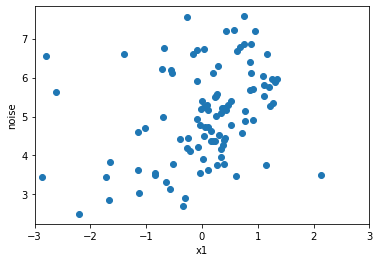

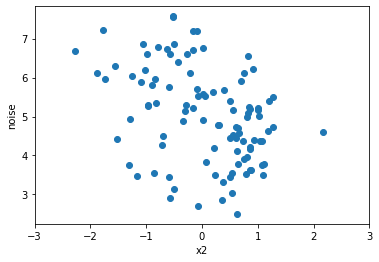

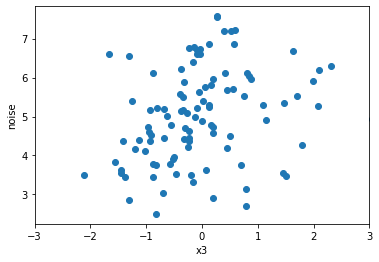

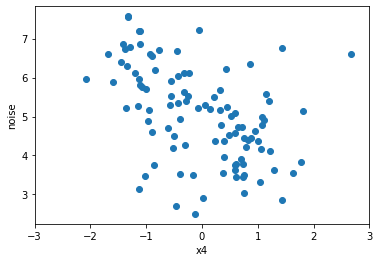

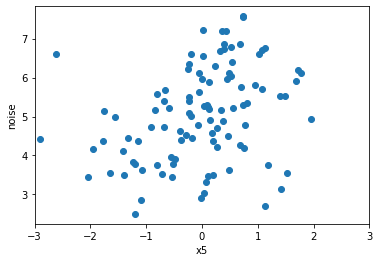

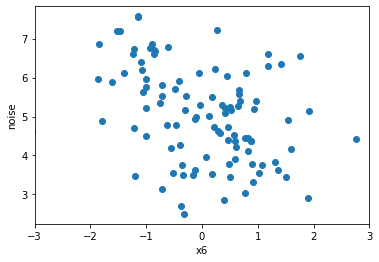

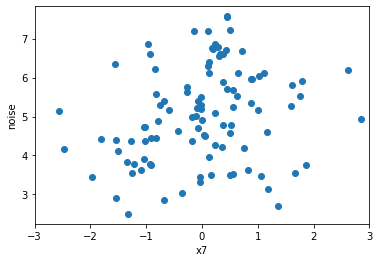

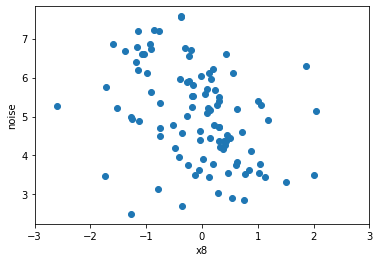

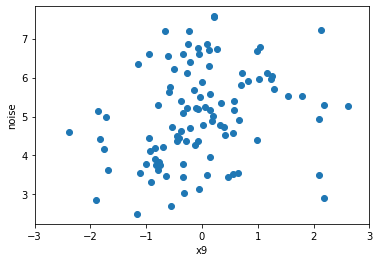

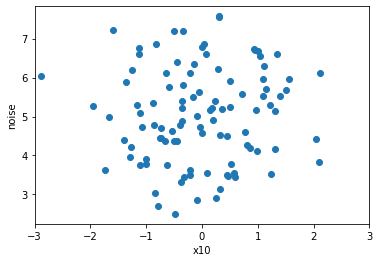

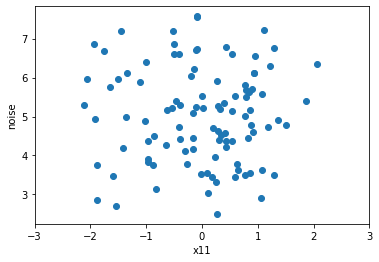

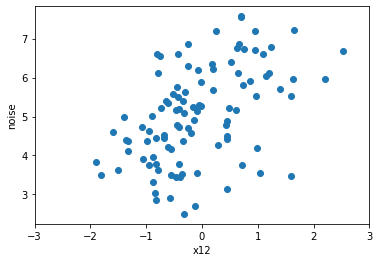

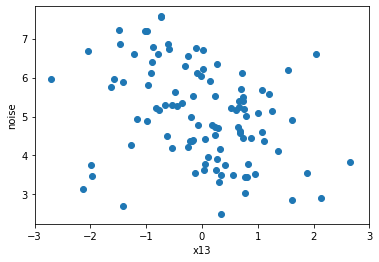

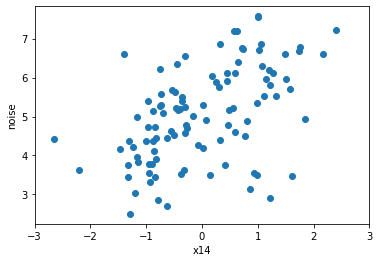

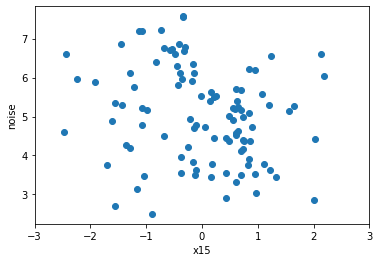

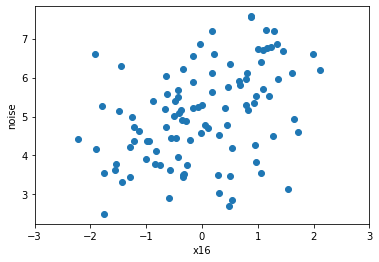

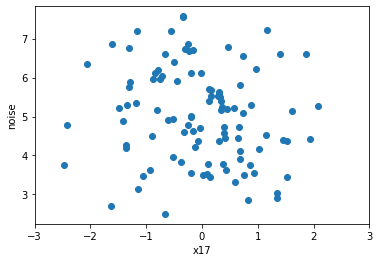

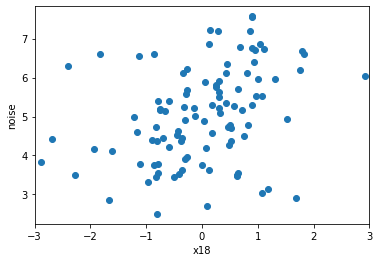

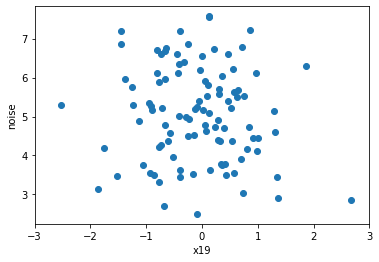

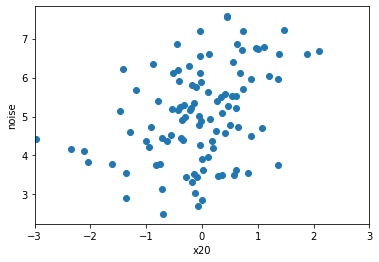

IndexError: single positional indexer is out-of-bounds

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# 分别绘制每个x和y的散点图
for i in range(len(train_X)):  # 从第2列开始循环，第1列是y
    # plt.scatter(train_y, train_X.iloc[:, i])
    # plt.xlabel('noise')  # 设置x轴标签
    # plt.ylabel(f'x{i}')  # 设置y轴标签
    # plt.show()  # 显示图像
    plt.scatter(train_X.iloc[:, i], train_y)
    plt.xlim(-3, 3)
    plt.ylabel('noise')
    plt.xlabel(f'x{i+1}')
    plt.show()  # 显示图像